Учимся работе с данными - от загрузки до моделирования.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


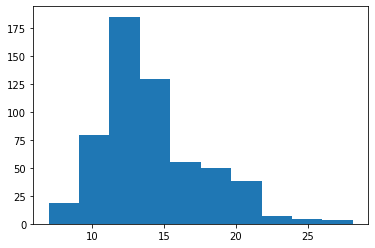

In [4]:
plt.hist(df['radius_mean'])
plt.show()

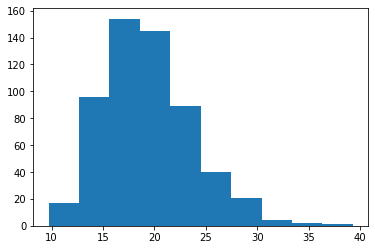

In [5]:
plt.hist(df['texture_mean'])
plt.show()

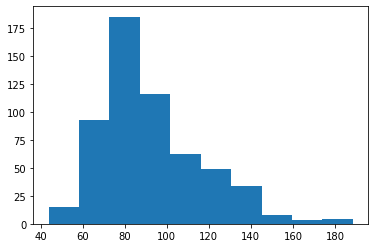

In [6]:
plt.hist(df['perimeter_mean'])
plt.show()

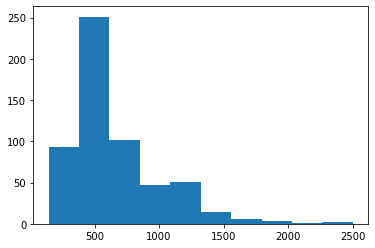

In [7]:
plt.hist(df['area_mean'])
plt.show()

In [8]:
len(df)

569

In [9]:
df.isna().sum().sum()

569

In [10]:
df = df.fillna(0)

In [11]:
df.isna().sum().sum()

0

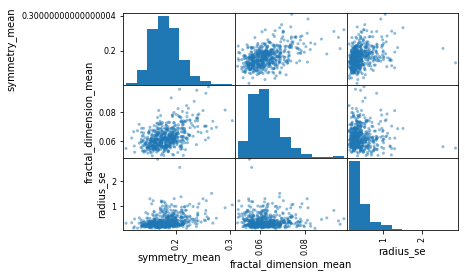

In [12]:
pd.plotting.scatter_matrix(df.iloc [:, 10:13]);

In [13]:
df.drop('Unnamed: 32', axis= 1 , inplace= True ) 

In [14]:
df.drop('id', axis= 1 , inplace= True ) 

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df.drop('diagnosis', axis=1))

StandardScaler()

In [19]:
scaled_features = scaler.transform(df.drop('diagnosis', axis=1))

In [20]:
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('diagnosis', axis=1).columns)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = scaled_data
y = df['diagnosis']

In [23]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier(n_neighbors = 1)

In [26]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [27]:
predictions = model.predict(x_test_data)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           B       0.93      0.98      0.96       100
           M       0.97      0.90      0.93        71

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [30]:
print(confusion_matrix(y_test_data, predictions))

[[98  2]
 [ 7 64]]


In [31]:
error_rates = []

In [32]:
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))

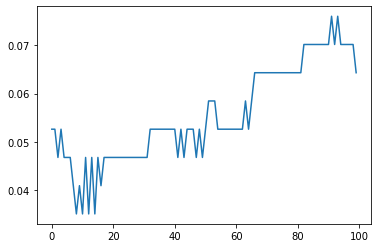

In [33]:
plt.plot(error_rates)